<a href="https://colab.research.google.com/github/tasyaaash29/TI01_Aulya-Natasya_Praktikum-ML/blob/main/Latihanpraktikum05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# Membaca dataset
df = pd.read_csv("/content/drive/MyDrive/Praktikum ML/Praktikum05/data/Iris.csv")

# Menampilkan 5 data teratas
print(df.head())

# Informasi dataset
print(df.info())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [15]:
# Menghapus kolom Id karena tidak relevan
df = df.drop(columns=['Id'])

# Mengecek missing value
print(df.isnull().sum())

# Mengecek duplikasi
print("Data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Data duplikat: 3


In [16]:
# Mapping species ke bentuk numerik
df['Species'] = df['Species'].astype('category')
df['Species_code'] = df['Species'].cat.codes
print(df[['Species', 'Species_code']].drop_duplicates())

             Species  Species_code
0        Iris-setosa             0
50   Iris-versicolor             1
100   Iris-virginica             2


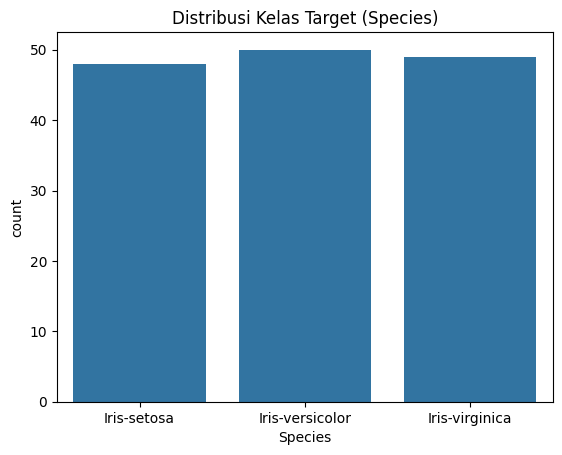

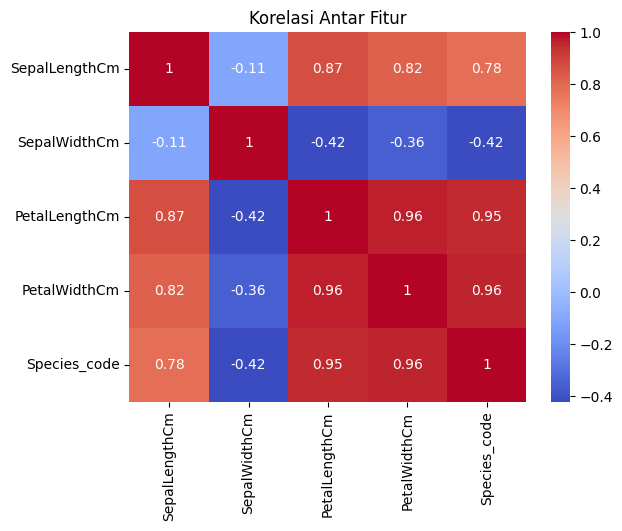

In [18]:
# Distribusi kelas
sns.countplot(x='Species', data=df)
plt.title('Distribusi Kelas Target (Species)')
plt.show()

# Heatmap korelasi
# Drop the non-numeric 'Species' column before calculating correlation
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [19]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species_code']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 117
Jumlah data testing: 30


In [20]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
y_pred = model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

